In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os, json

In [48]:
path_covid_cases = r"/home/joseba/Master/Master-git/DataVis/Resampling Methods/proyecto/casos_tecnica_provincia.csv"
path_temperatures = r"/home/joseba/Master/Master-git/DataVis/Resampling Methods/proyecto/temperatura/Alava.json" 
json_dir = r'/home/joseba/Master/Master-git/DataVis/Resampling Methods/proyecto/temperatura'

## EPIDEMIOLOGICAL DATA

In [49]:
df = pd.read_csv(path_covid_cases)
diccionario = {'C' : 'coruña', 'VI' : 'alava', 'AB':'albacete', 'A':'alicante', 'AL': 'almeria', 'O':'asturias','AV':'avila','BA':'badajoz',
'PM':'baleares','B':'barcelona','BU':'burgos','CC':'caceres','CA':'cadiz','CE':'ceuta','S':'cantabria','CS':'castellon','CR':'ciudadReal','CO':'cordoba',
'CU':'cuenca','GI':'girona','GR':'granada','GU':'guadalajara',
'SS':'gipuzkoa','H':'huelva','HU':'huesca','J':'jaen','LO':'laRioja','GC':'lasPalmas','LE':'leon','L':'lleida','LU':'lugo','M':'madrid','MA':'malaga','ML': 'melilla',
'MU':'murcia','NA':'navarra','NC':'navarra','OR':'ourense','P':'palencia','PO':'pontevedra','SA':'salamanca','TF':'santaCruzDeTenerife','SG':'segovia','SE':'sevilla','SO':'soria',
'T':'tarragona','TE':'teruel','TO':'toledo','V':'valencia','VA':'valladolid','BI':'bizkaia','ZA':'zaragoza','Z':'zamora'}

for key in diccionario:  
    df.loc[df["provincia_iso"] == key, "provincia"] = diccionario[key]
df = df[df['provincia_iso'].notna()]


df.head(52)

,provincia_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida,provincia
0,A,2020-01-01,0,0,0,0,0,0,alicante
1,AB,2020-01-01,0,0,0,0,0,0,albacete
2,AL,2020-01-01,0,0,0,0,0,0,almeria
3,AV,2020-01-01,0,0,0,0,0,0,avila
4,B,2020-01-01,0,0,0,0,0,0,barcelona
5,BA,2020-01-01,0,0,0,0,0,0,badajoz
6,BI,2020-01-01,0,0,0,0,0,0,bizkaia
7,BU,2020-01-01,0,0,0,0,0,0,burgos
8,C,2020-01-01,0,0,0,0,0,0,coruña
9,CA,2020-01-01,0,0,0,0,0,0,cadiz


## METEOROLOGICAL DATA

In [50]:
json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
        json_data['site'] = file.rsplit("/", 1)[-1]
    dfs.append(json_data)
df2 = pd.concat(dfs)

df2["provincia"] = df2["provincia"].str.lower()

df2["provincia"].replace({"las palmas": "lasPalmas", "illes balears":"baleares", "ciudad real":"ciudadReal", 
"sta. cruz de tenerife":"santaCruzDeTenerife", "la rioja":"laRioja", "araba/alava":"alava", "a coruña":"coruña"}, inplace=True)

In [51]:
df2["prec"].replace({"Ip": "0,0"}, inplace=True)

to_float_array = ['tmed','velmedia','prec']
for values in to_float_array:
    df2[values] = df2[values].str.replace(',','.')
    df2[values] = pd.to_numeric(df2[values])

df2[df2["provincia"] == 'coruña']


,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,...,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin,site
0,2020-01-01,1387,A CORUÑA,coruña,58,9.0,0.0,"6,4",23:40,"11,5",...,16,1.9,"5,3",05:50,"6,8","1025,4",Varias,"1021,7",24,coruña.json
1,2020-01-02,1387,A CORUÑA,coruña,58,9.3,0.2,"6,2",04:10,"12,4",...,22,2.8,"11,4",14:20,"0,0","1021,7",00,"1019,5",16,coruña.json
2,2020-01-03,1387,A CORUÑA,coruña,58,11.9,0.0,"8,8",23:59,"15,0",...,17,2.5,"9,2",03:30,"4,5","1029,4",22,"1020,6",02,coruña.json
3,2020-01-04,1387,A CORUÑA,coruña,58,9.4,0.0,"5,7",08:10,"13,1",...,99,0.8,"4,7",Varias,"7,2","1030,5",10,"1026,5",24,coruña.json
4,2020-01-05,1387,A CORUÑA,coruña,58,8.2,0.0,"4,4",07:50,"11,9",...,16,1.7,"5,8",07:20,"8,5","1026,5",00,"1020,8",22,coruña.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,2022-02-03,1387,A CORUÑA,coruña,58,12.6,3.2,"10,2",02:50,"14,9",...,99,3.1,"8,6",Varias,"2,1","1015,7",00,"1013,9",07,coruña.json
765,2022-02-04,1387,A CORUÑA,coruña,58,12.0,4.6,"9,6",22:30,"14,4",...,28,2.8,"8,9",07:10,"4,4","1021,8",24,"1014,7",05,coruña.json
766,2022-02-05,1387,A CORUÑA,coruña,58,10.6,0.0,"8,2",23:59,"12,9",...,99,4.2,"10,0",Varias,"8,9","1024,6",Varias,"1021,8",Varias,coruña.json
767,2022-02-06,1387,A CORUÑA,coruña,58,10.1,0.0,"5,7",07:20,"14,5",...,17,1.7,"4,7",Varias,"5,9","1026,5",Varias,"1023,7",04,coruña.json


In [52]:
df2["provincia"].unique()

array(['bizkaia', 'segovia', 'girona', 'cuenca', 'castellon', 'tarragona',
       'madrid', 'teruel', 'granada', 'navarra', 'alicante', 'palencia',
       'zamora', 'cordoba', 'sevilla', 'ceuta', 'valencia', 'valladolid',
       'pontevedra', 'cadiz', 'lasPalmas', 'guadalajara', 'baleares',
       'toledo', 'malaga', 'huelva', 'cantabria', 'salamanca',
       'ciudadReal', 'melilla', 'caceres', 'jaen', 'almeria', 'asturias',
       'coruña', 'santaCruzDeTenerife', 'ourense', 'zaragoza', 'gipuzkoa',
       'lugo', 'huesca', 'badajoz', 'lleida', 'soria', 'leon', 'burgos',
       'murcia', 'laRioja', 'barcelona', 'avila', 'alava', 'albacete'],
      dtype=object)

## JOIN AND CREATE NEW DATAFRAME

In [53]:
#SOLO EJECUTAR UNA VEZ

for fech, prov , temp, viento, altitud, lluvia in zip(df2["fecha"].values, df2["provincia"].values, df2["tmed"].values, df2["velmedia"].values, df2["altitud"].values, df2["prec"].values):
    df.loc[(df["fecha"] == fech) & (df["provincia"] == prov), "tmed"] = temp
    df.loc[(df["fecha"] == fech) & (df["provincia"] == prov), "wind"] = viento
    df.loc[(df["fecha"] == fech) & (df["provincia"] == prov), "prec"] = lluvia
    df.loc[(df["fecha"] == fech) & (df["provincia"] == prov), "alt"] = altitud
df = df.sort_values(by=['provincia', 'fecha'])


In [56]:
df.to_csv("total_with_NaN.csv",index=False)

In [55]:
df[df["provincia"]== "lleida"]


,provincia_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida,provincia,tmed,wind,prec,alt
23,L,2020-01-01,0,0,0,0,0,0,lleida,3.6,1.7,0.0,185
76,L,2020-01-02,0,0,0,0,0,0,lleida,2.6,1.1,0.1,185
129,L,2020-01-03,1,1,0,0,0,0,lleida,2.6,1.4,0.1,185
182,L,2020-01-04,0,0,0,0,0,0,lleida,3.2,1.1,0.0,185
235,L,2020-01-05,0,0,0,0,0,0,lleida,4.8,1.4,0.0,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40621,L,2022-02-05,353,23,0,330,0,0,lleida,9.6,1.1,0.0,185
40674,L,2022-02-06,290,13,0,277,0,0,lleida,5.8,1.9,0.0,185
40727,L,2022-02-07,610,73,0,530,0,7,lleida,8.7,2.5,0.0,185
40780,L,2022-02-08,370,24,0,346,0,0,lleida,NaN,NaN,NaN,NaN


In [57]:
df_export = df.copy( ).reset_index()
df_export.drop(["num_casos_prueba_pcr",	"num_casos_prueba_test_ac","num_casos_prueba_ag","num_casos_prueba_elisa","num_casos_prueba_desconocida", "index"], axis=1, inplace=True)

df_export = df_export.dropna()
df_export.to_csv("data_provincias/total.csv",index=False)
df_export

,provincia_iso,fecha,num_casos,provincia,tmed,wind,prec,alt
0,VI,2020-01-01,0,alava,0.7,0.6,0.0,513
1,VI,2020-01-02,0,alava,2.1,4.7,0.0,513
2,VI,2020-01-03,0,alava,0.8,0.3,0.4,513
3,VI,2020-01-04,0,alava,5.4,2.5,0.0,513
4,VI,2020-01-05,0,alava,3.9,0.8,0.0,513
...,...,...,...,...,...,...,...,...
40085,ZA,2022-02-03,78,zaragoza,6.5,1.1,0.0,582
40086,ZA,2022-02-04,89,zaragoza,9.4,2.8,0.0,582
40087,ZA,2022-02-05,175,zaragoza,6.8,2.5,0.0,582
40088,ZA,2022-02-06,119,zaragoza,3.3,1.1,0.0,582


## EXPORT NEW TABLES

In [5]:
df_export = pd.read_csv("data_provincias/total.csv")
for provincias in df_export["provincia"].unique():
    df_provincial = df_export[df_export["provincia"] == provincias]
    df_provincial.to_csv(f"data_provincias/{provincias}.csv",index=False)

## Some plots

* First wave : 15 February  – 15 June 2020 (2020-02-15 to 2020-06-15)
* Second wave: 10 August – 30 November 2020 (2020-07-10 to 2020-11-30)
* Third wave: 1 December 2020 – 28 February 2021 (2020-12-01 to 2021-02-28 )
* Fourth wave: 1 March 2021 – 15 June 2021 (2021-03-01 to 2021-06-15)
* Fifth wave: 11 November 2021 – 7 February 2022 (2021-11-01 to 2022-02-07)



In [6]:
# import data for each wave
all = pd.read_csv("data_provincias/total.csv")
wave = {"first":["2020-02-15","2020-06-15"],"second":["2020-07-10","2020-11-30"],
 "third":["2020-12-01","2021-02-28"],"fourth":["2021-03-01","2021-06-15"],
 "fifth":["2021-11-01","2022-02-07"]}

for key in wave:  
    start_date = pd.to_datetime(wave[key][0])
    end_date = pd.to_datetime(wave[key][1])

    for provincias in all["provincia"].unique():
        df = pd.read_csv(f"data_provincias/{provincias}.csv")
        df['fecha'] = pd.to_datetime(df['fecha'])  
        #Mask for the time period
        mask = (df['fecha'] > start_date) & (df['fecha'] <= end_date)
        df = df.loc[mask]
        df.to_csv(f"data_waves/{key}/{provincias}_{key}.csv",index=False)

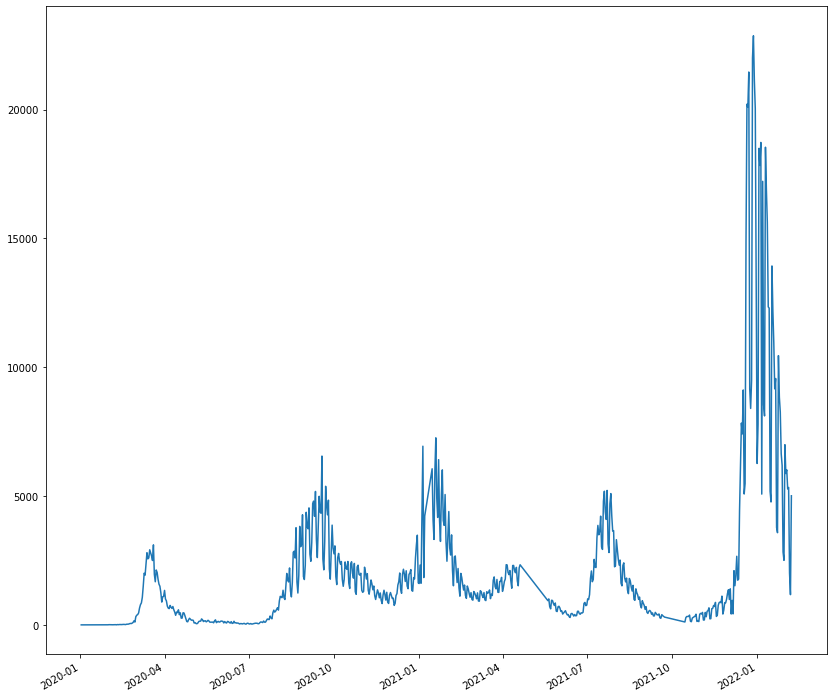

In [7]:
# import data and select the time period

infile = "data_provincias/madrid.csv"
df = pd.read_csv(infile)

df['fecha'] = pd.to_datetime(df['fecha'])  

#Mask for the time period
start_date = '2020-01-01'
end_date =  '2022-02-07'
mask = (df['fecha'] > start_date) & (df['fecha'] <= end_date)
df = df.loc[mask]
x = df['fecha']
y =  df['num_casos']

fig = plt.figure(figsize=(14,10))
fig.subplots_adjust(top=1.1, bottom=-.1) #centrar la imagen
plt.plot_date(x, y, '-')
## Rotate date labels automatically
fig.autofmt_xdate()
plt.show()


In [8]:
df_export = pd.read_csv("data_provincias/total.csv")
with open(f"datos_medias.csv","a", encoding="utf-8") as fout: 
    
    for prov in df_export["provincia"].unique():
        province  = df_export.loc[df_export["provincia"] == prov]
        meant_temp = province["tmed"].mean()
        mean_cont = province["num_casos"].mean()
        fout.write("{},{},{}\n".format(prov, meant_temp, mean_cont))
        
        


In [15]:
data = pd.read_csv('datos_medias.csv', sep=',',header=None, index_col =0)
data

,1,2,3,4
0,,,,
alava,12.074902,114.834850,333626,333940
albacete,15.578927,104.361257,386464,388270
alicante,18.716927,555.541667,1881762,1879888
almeria,16.957027,164.702703,731792,727945
asturias,13.887632,241.135526,1011792,1018784
avila,12.028218,47.071521,158421,157664
badajoz,17.372822,187.711313,669943,672137
baleares,19.483133,319.405622,1173008,1171543
barcelona,16.832115,2102.069191,5714730,5743402


In [9]:
#no funcionaba por meter a mano los datos medios de N popu

data = pd.read_csv('datos_medias.csv', sep=',',header=None, index_col =0)


data.columns = ["tmed","num_casos_dia","pop_2021","pop_2020"]
data['pop_2021'] = data['pop_2021'].astype(int)
data['pop_2020'] = data['pop_2020'].astype(int)

data["pop_media_2020-2021"] = (data["pop_2021"] + data["pop_2020"])/2
data["ratio_pop_casos"] = 100*data["num_casos_dia"]/data["pop_media_2020-2021"]
df_sorted= data.sort_values('ratio_pop_casos', ascending = False)

df_sorted


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
pastel_colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(15, 10))
df_sorted["ratio_pop_casos"].head(10).plot(
    kind="barh",
    title="Percentage of the daily population affected.",
    color=pastel_colors,
)

plt.gca().invert_yaxis()
plt.show()


In [ ]:
data.index

Index(['alava', 'albacete', 'alicante', 'almeria', 'asturias', 'avila',
       'badajoz', 'baleares', 'barcelona', 'bizkaia', 'burgos', 'caceres',
       'cadiz', 'cantabria', 'castellon', 'ceuta', 'ciudadReal', 'cordoba',
       'coruña', 'cuenca', 'gipuzkoa', 'girona', 'granada', 'guadalajara',
       'huelva', 'huesca', 'jaen', 'laRioja', 'lasPalmas', 'leon', 'lleida',
       'lugo', 'madrid', 'malaga', 'melilla', 'murcia', 'navarra', 'ourense',
       'palencia', 'pontevedra', 'salamanca', 'santaCruzDeTenerife', 'segovia',
       'sevilla', 'soria', 'tarragona', 'teruel', 'toledo', 'valencia',
       'valladolid', 'zamora', 'zaragoza'],
      dtype='object', name=0)